# Stock Market Analysis :
## Obtaining Data, Visualization, Analysis in Python


- Get Historical Data for stocks
- Plot the stock market data and analyse the performance
- Get the fundamental, futures and options data

> yfinance를 사용하여 나스닥 주요 기업의 주가 데이터를 불러온 후 다양한 방식으로 분석한 프로젝트입니다.

#### @jhbale11

## Obtaining Data :
### Yahoo Finance

- yfinance 모듈을 사용하여 주가 데이터를 불러옵니다.
- 원하는 기간, 원하는 기업의 ticker를 설정합니다.

In [1]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2022-03-15'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400
2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800
2021-07-07,3717.379883,3734.199951,3678.909912,3696.580078,3696.580078,5328100
2021-07-08,3643.560059,3759.989990,3621.120117,3731.409912,3731.409912,5180600
2021-07-09,3722.520020,3748.000000,3693.399902,3719.340088,3719.340088,3748200


------------------------------------------------
- matplot 라이브러리를 사용하여 시각화하는 것이 일반적입니다.
- DataFrame에 바로 plot() 함수를 적용할 수 있습니다.

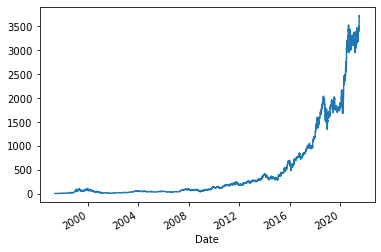

In [2]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

- 더 나은 시각적 가독성을 위해서 크기를 조정하고, 라벨과 그리드 라인을 추가합니다.

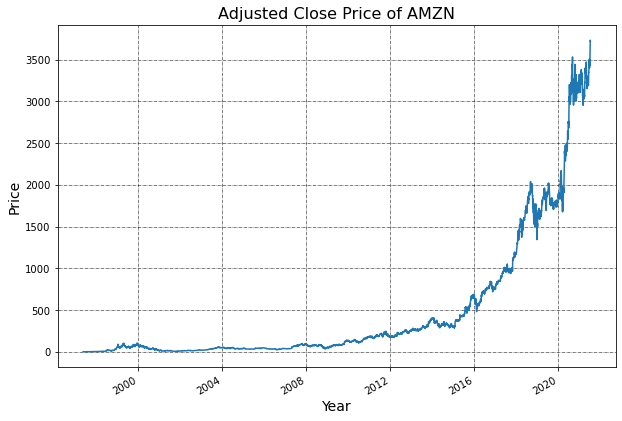

In [3]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

### Get Stock Market Data for Multiple Tickers

- ticker list를 설정하여 여러 기업의 주가 데이터를 한번에 불러올 수 있습니다.

In [5]:
import pandas as pd

# Set the start and end date
start_date = '1990-01-01'
end_date = '2022-03-15'

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
1990-01-02,0.267231,10.477850,0.390554,3.720554
1990-01-03,0.269025,10.571403,0.392754,3.720554
1990-01-04,0.269922,10.691683,0.404306,3.700817
1990-01-05,0.270819,10.664956,0.394405,3.661343
1990-01-08,0.272613,10.731779,0.400455,3.710687


--------------------------------------------------------------
- 위에서와 같은 방식으로 시각화할 수 있습니다.

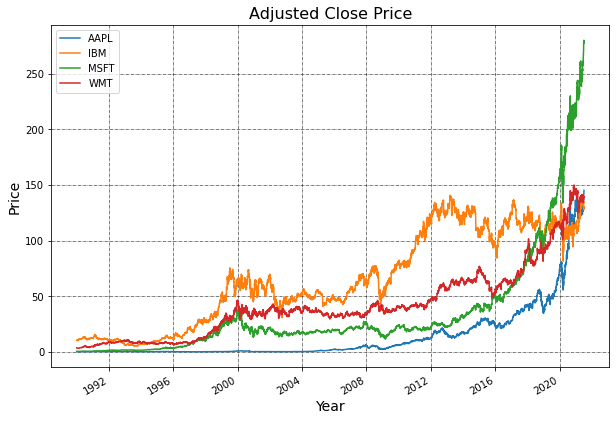

In [6]:
# Plot all the close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

### S&P500 Stock Tickers

- S&P500 지수에 편입된 기업들의 주가를 한번에 불러오고 싶다면 아래와 같은 방식을 사용할 수 있습니다.
- https://en.wikipedia.org/wiki/List_of_S%26P_500_companies 링크에서 S&P500 component stock 정보를 불러올 수 있습니다.

In [7]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())

start_date = '1990-01-01'
end_date = '2022-03-15'

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [8]:
# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),start_date,end_date, auto_adjust=True)['Close']
print(data.head())

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
             A  AAL  AAP      AAPL  ABBV  ABC    ABMD       ABT  ACN  \
Date                                                                   
1990-01-02 NaN  NaN  NaN  0.266078   NaN  NaN  5.8750  1.003031  NaN   
1990-01-03 NaN  NaN  NaN  0.267863   NaN  NaN  5.8125  1.006652  NaN   
1990-01-04 NaN  NaN  NaN  0.268757   NaN  NaN  5.6250  1.004842  NaN   
1990-01-05 NaN  NaN  NaN  0.269650   NaN  NaN  5.7500  0.993979  NaN   
1990-01-08 NaN  NaN  NaN  0.271435   NaN  NaN  5.7500  1.005415  NaN   

                ADBE  ...  WYNN       XEL       XOM      XRAY  XYL  YUM  ZBH  \
Date                  ...                                                      
1990-01-02  1.188336  ...   NaN  4.292981  4.207464  0.834939  NaN  NaN  NaN   
1990-01-03  1.247020  ...   NaN  4.279729  4.165

## Fundamental Data :

- yfinance를 사용하여 fundatmental data를 불러오는 것도 가능합니다.
- 원하는 기업의 ticker를 설정한 후 원하는 정보를 불러옵니다.

In [10]:
# Set the ticker as MSFT
msft = yf.Ticker("MSFT")

### Key Ratios

In [14]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [15]:
# get price to book
pb = msft.info['priceToBook']
pe = msft.info['regularMarketPrice']/msft.info['trailingEps']
print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

Price to Book Ratio is: 14.25
Price to Earnings Ratio is: 32.39


### Revenues

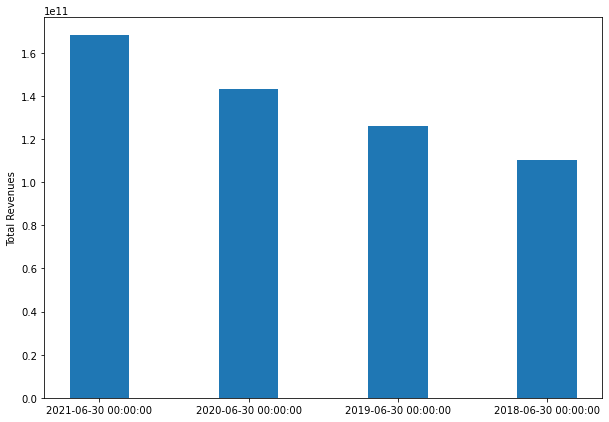

In [28]:
import numpy as np
# show revenues
revenue = msft.financials.loc['Total Revenue']

x = np.arange(4)
plt.figure(figsize=(10, 7))
plt.bar(x, revenue.values, width=0.4)
plt.xticks(x, revenue.index)
plt.ylabel("Total Revenues")
plt.show()

### Earnings Before Interest and Taxes(EBIT)

In [30]:
msft.financials

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,20716000000.0,19269000000.0,16876000000.0,14726000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,71102000000.0,53036000000.0,43688000000.0,36474000000.0
Minority Interest,None,None,None,None
Net Income,61271000000.0,44281000000.0,39240000000.0,16571000000.0
Selling General Administrative,25224000000.0,24523000000.0,23098000000.0,22223000000.0
Gross Profit,115856000000.0,96937000000.0,82933000000.0,72007000000.0
Ebit,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Operating Income,69916000000.0,53145000000.0,42959000000.0,35058000000.0
Other Operating Expenses,None,None,None,None


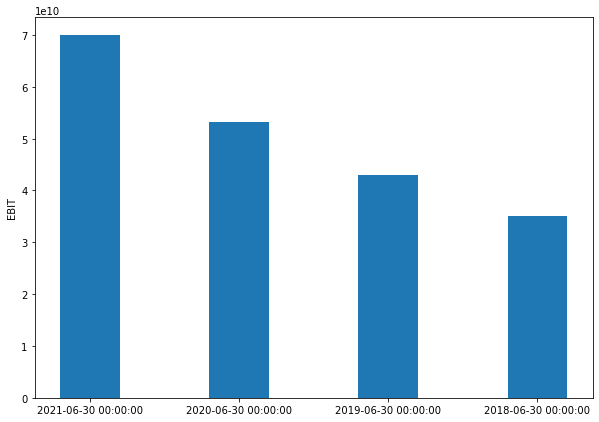

In [31]:
EBIT = msft.financials.loc['Ebit']

x = np.arange(4)
plt.figure(figsize=(10, 7))
plt.bar(x, EBIT.values, width=0.4)
plt.xticks(x, EBIT.index)
plt.ylabel("EBIT")
plt.show()

## Stock Market Analysis

pyfolio 라이브러리를 사용하여 아래와 같은 분석이 가능합니다.
- Cumulative Returns
- Drawdown Plot
- Sharpe Ratio
- Sortino Ratio
- Calmar Ratio

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


/home/junghwan/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Start date,2017-03-28
End date,2022-03-24
Total months,59
,Backtest
Annual return,33.1%
Cumulative returns,317.3%
Annual volatility,22.8%
Sharpe ratio,1.37
Calmar ratio,1.38
Stability,0.97
Max drawdown,-24.1%


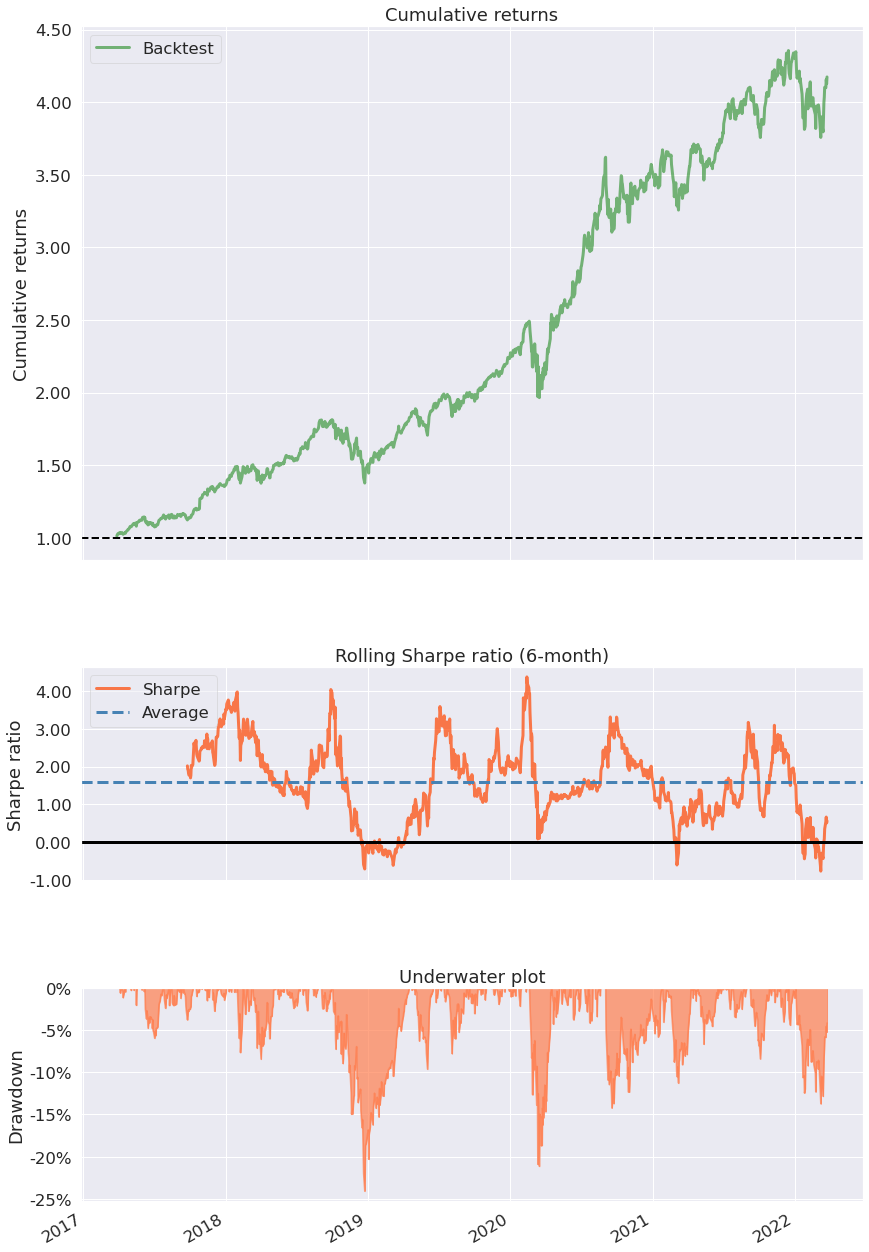

In [33]:
# Define the ticker list
tickers_list = ['AAPL', 'AMZN', 'MSFT', 'WMT']

# Import pandas and create a placeholder for the data
import pandas as pd
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
import yfinance as yf
for ticker in tickers_list:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
# Compute the returns of individual stocks and then compute the daily mean returns.
# The mean return is the daily portfolio returns with the above four stocks.
data = data.pct_change().dropna().mean(axis=1)

# Import Pyfolio
import pyfolio as pf

# Get the full tear sheet
pf.create_simple_tear_sheet(data)